## Nondefectivity of Gaussian moment secants in degree at least 5

For fixed degree $d$ and dimension $n$, the script checks whether secants of the Gaussian moment variety have the expected dimension up to the maximum possible rank obtained from counting parameters. The script needs expressions for the moments as polynomials in the parameters \(q, ℓ\), which correspond to the covariance form and the form of expected values. These are calculated in the separate script `gaussian-moment-derivatives.ipynb`.


In [1]:
Pkg.activate("identifiability")
using DynamicPolynomials, SparseArrays, Plots, DataFrames, CSV, JLD2, FileIO
include("gaussian-moments.jl");

LoadError: ArgumentError: Package JLD2 not found in current path.
- Run `import Pkg; Pkg.add("JLD2")` to install the JLD2 package.

In [ ]:
# for secants of different degree, remember to manually input moments and their  l- and q- derivatives f and g.
# there is a separate script in the appendix computing those moment expressions
const d=6;
const moments_6(q, ℓ) = 15q^3 + 45q^2*ℓ^2 + 15q*ℓ^4 + ℓ^6;
const f(q, ℓ) = 3q^2 + 6q*ℓ^2 + ℓ^4;
const g(q, ℓ) = 15q^2*ℓ + 10q*ℓ^3 + ℓ^5;


In [3]:
filepath_csv = "../data/secant-dimensions-deg6.csv"; #"../data/secant-dimensions-deg5.csv"
filepath_jld = "../data/skewsecants-deg6.jld2"; #"../data/skewsecants-deg5.jld2"

In [ ]:
n_min = 2;
n_max = 11;
@polyvar X[1:n_max];

restart = false; # set this to true in order to overwrite results of previous computations and start from scratch
initdf = DataFrame(:n=>Int[], :secant_dim=>Int[], :exp_dim=>Int[], :rank=>Int[]);
df = initdf;
if isfile(filepath_csv)
    df = DataFrame(CSV.read(filepath_csv, DataFrame))
    if restart || (size(df, 1) == 0)
        df = initdf;
        CSV.write(filepath_csv, df)
    end
else 
    CSV.write(filepath_csv, df)
end
is_secant_dim_computed(i) = i∈df.n

compute_secant_dimensions = function(n_max::Int)
    for i = 2:n_max
        # check if the values have already been computed before
        if is_secant_dim_computed(i)
            continue;
        end
        M = length(monomials(X[1:i], 1:2));
        N = length(monomials(X[1:i], d));
        m = Int(floor(N/M));

        dim, exp_dim, m, A, B = secant_tangent_dimension_general(i, X[1:i], m);

        new_row = DataFrame(:n=>[i], :secant_dim=>[dim], :exp_dim=>[exp_dim], :rank=>[m])
        append!(df, new_row)
        save(filepath_jld, Dict("A$(i)" => A, "B$(i)" => B, "dim$(i)" => dim,  "exp_dim$(i)" => exp_dim, "rank$(i)" => m))
        CSV.write(filepath_csv, new_row; append=true)
    end
end



#29 (generic function with 1 method)

In [ ]:
compute_secant_dimensions(n_max);

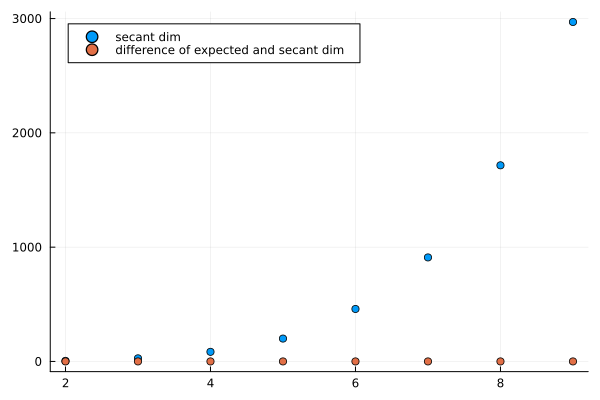

In [6]:
plot(n_min:n_max, df.secant_dim, seriestype=:scatter, label="secant dim", legend=:topleft)
plot!(n_min:n_max, df.exp_dim-df.secant_dim, seriestype=:scatter, label="difference of expected and secant dim ")

In [ ]:
df

Row,n,secant_dim,exp_dim,rank
,Int64,Int64,Int64,Int64
1,2,5,5,1
2,3,27,27,3
3,4,84,84,6
4,5,200,200,10
5,6,459,459,17
6,7,910,910,26
7,8,1716,1716,39
